## Plot Results of Solving Ising Model using Density Matrix Renormalizaton Group

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
def mean_field_energy_density(lmbda):
    if np.abs(lmbda) <= 2:
        return -1 - lmbda ** 2 / 4
    return -np.abs(lmbda)

In [3]:
compiled_dir = f"..{os.sep}compiled"
data_dir = f"..{os.sep}data"
plot_dir = f"..{os.sep}plots"

In [4]:
program = f"{compiled_dir}{os.sep}dmrg_ising"

In [5]:
N = list(range(2, 3))

In [6]:
lam = np.arange(-5, 5.1, 0.1)

In [7]:
gs_energy = np.zeros((len(N), len(lam)))
gs_energy[:] = np.nan

In [8]:
max_iterations = np.zeros((len(N), len(lam)))
max_iterations[:] = np.nan

In [9]:
for i in range(len(N)):
    print(f"Running N = {N[i]} ...")
    for j in range(len(lam)):
        output = subprocess.run(
            [program, "--N", str(N[i]), "--lambda", str(lam[j]), "--max_iter", str(500), "--thres", str(0.0005)],
            stdout=subprocess.PIPE,
            encoding="ascii"
        )

        results = output.stdout.split("\n")

        did_converge = results[8].split("=")[1].strip()

        if did_converge == "T":
            gs_energy[i, j] = float(results[6].split("=")[1])
            max_iterations[i, j] = int(results[7].split("=")[1])

Running N = 2 ...


In [10]:
max_iterations[0]

array([102., 101., 101., 100.,  99.,  98.,  97.,  97.,  96.,  95.,  94.,
        94.,  93.,  92.,  92.,  91.,  90.,  89.,  89.,  88.,  87.,  86.,
        85.,  84.,  83.,  82.,  81.,  80.,  78.,  77.,  75.,  74.,  72.,
        70.,  69.,  67.,  65.,  64.,  62.,  61.,  59.,  58.,  50.,  56.,
        55.,  55.,  54.,  54.,  53.,  68.,  53.,  53.,  53.,  54.,  54.,
        65.,  55.,  56.,  57.,  58.,  59.,  61.,  62.,  64.,  65.,  67.,
        69.,  70.,  72.,  74.,  75.,  77.,  78.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  89.,  90.,  91.,  92.,  92.,
        93.,  94.,  94.,  95.,  96.,  97.,  97.,  98.,  99., 100., 101.,
       101., 102.])

In [11]:
gs_energy[0]

array([-5.0023, -4.9039, -4.8061, -4.7079, -4.6097, -4.5116, -4.4136,
       -4.3162, -4.2184, -4.1207, -4.0231, -3.9261, -3.8288, -3.7316,
       -3.635 , -3.5381, -3.4414, -3.3449, -3.2491, -3.1531, -3.0573,
       -2.9618, -2.8666, -2.7718, -2.6774, -2.5835, -2.49  , -2.3971,
       -2.3043, -2.2128, -2.1215, -2.0317, -1.9425, -1.8547, -1.7688,
       -1.6844, -1.6021, -1.5231, -1.4468, -1.3749, -1.3071, -1.2451,
       -1.1848, -1.1394, -1.0962, -1.06  , -1.0295, -1.0056, -0.9876,
       -0.9694, -0.9732, -0.9768, -0.9876, -1.0056, -1.0295, -1.0543,
       -1.0962, -1.1394, -1.1891, -1.2451, -1.3071, -1.3749, -1.4468,
       -1.5231, -1.6021, -1.6844, -1.7688, -1.8547, -1.9425, -2.0317,
       -2.1215, -2.2128, -2.3043, -2.3971, -2.49  , -2.5835, -2.6774,
       -2.7718, -2.8666, -2.9618, -3.0573, -3.1531, -3.2491, -3.3449,
       -3.4414, -3.5381, -3.635 , -3.7316, -3.8288, -3.9261, -4.0231,
       -4.1207, -4.2184, -4.3162, -4.4136, -4.5116, -4.6097, -4.7079,
       -4.8061, -4.9

In [12]:
mf_gs_energy = [mean_field_energy_density(l) for l in lam]

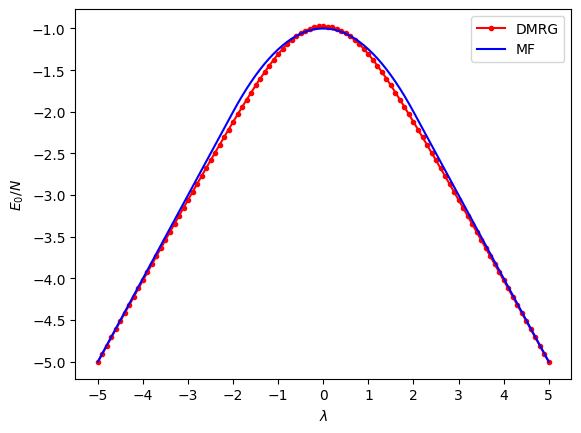

In [13]:
plt.plot(lam, gs_energy[0], "r.-", label="DMRG")
plt.plot(lam, mf_gs_energy, "b-", label="MF")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0/N$")
plt.xticks(np.arange(-5, 6, 1))
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}energy_vs_lambda_dmrg.pdf", format="pdf", bbox_inches="tight")